In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2  # To calculate p-value based on Chi-Square statistic

In [4]:
# Step 1: Load the data
data = pd.read_csv('customer_segmentation_data.csv')

# Step 2: Extract relevant columns
gender = data['gender']
preferred_category = data['preferred_category']

In [5]:
# Step 3: Create a contingency table
contingency_table = pd.crosstab(gender, preferred_category)
print("Contingency Table:")
print(contingency_table)

Contingency Table:
preferred_category  Clothing  Electronics  Groceries  Home & Garden  Sports
gender                                                                     
Female                    56           65         66             68      61
Male                      56           76         71             77      77
Other                     58           74         62             61      72


In [6]:
# Step 4: Calculate row and column totals
row_totals = contingency_table.sum(axis=1)
column_totals = contingency_table.sum(axis=0)
grand_total = contingency_table.values.sum()

In [7]:
# Step 5: Manually calculate expected frequencies
expected_frequencies = np.outer(row_totals, column_totals) / grand_total
print("\nExpected Frequencies:")
print(expected_frequencies)


Expected Frequencies:
[[53.72  67.94  62.884 65.096 66.36 ]
 [60.69  76.755 71.043 73.542 74.97 ]
 [55.59  70.305 65.073 67.362 68.67 ]]


In [8]:
# Step 6: Manually calculate Chi-Square statistic
observed_frequencies = contingency_table.values
chi_square_stat = ((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies).sum()
print(f"\nChi-Square Statistic: {chi_square_stat}")

# Step 7: Calculate degrees of freedom
num_rows, num_columns = contingency_table.shape
degrees_of_freedom = (num_rows - 1) * (num_columns - 1)
print(f"Degrees of Freedom: {degrees_of_freedom}")


Chi-Square Statistic: 2.7344691761731093
Degrees of Freedom: 8


In [9]:
# Step 8: Get the critical value from the Chi-Square distribution table
alpha = 0.05  # Significance level
critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)
print(f"Critical Value at alpha={alpha}: {critical_value}")

Critical Value at alpha=0.05: 15.50731305586545


In [10]:
# Step 9: Calculate p-value
p_value = 1 - chi2.cdf(chi_square_stat, degrees_of_freedom)
print(f"P-value: {p_value}")

P-value: 0.9499006097138306


In [11]:
# Step 10: Hypothesis testing
print("\nHypothesis Testing Result:")
if chi_square_stat > critical_value:
    print(f"Chi-Square Statistic ({chi_square_stat}) > Critical Value ({critical_value}), we reject the null hypothesis (H0).")
    print("Conclusion: There is a significant relationship between gender and preferred product category.")
else:
    print(f"Chi-Square Statistic ({chi_square_stat}) <= Critical Value ({critical_value}), we fail to reject the null hypothesis (H0).")
    print("Conclusion: There is no significant relationship between gender and preferred product category.")


Hypothesis Testing Result:
Chi-Square Statistic (2.7344691761731093) <= Critical Value (15.50731305586545), we fail to reject the null hypothesis (H0).
Conclusion: There is no significant relationship between gender and preferred product category.


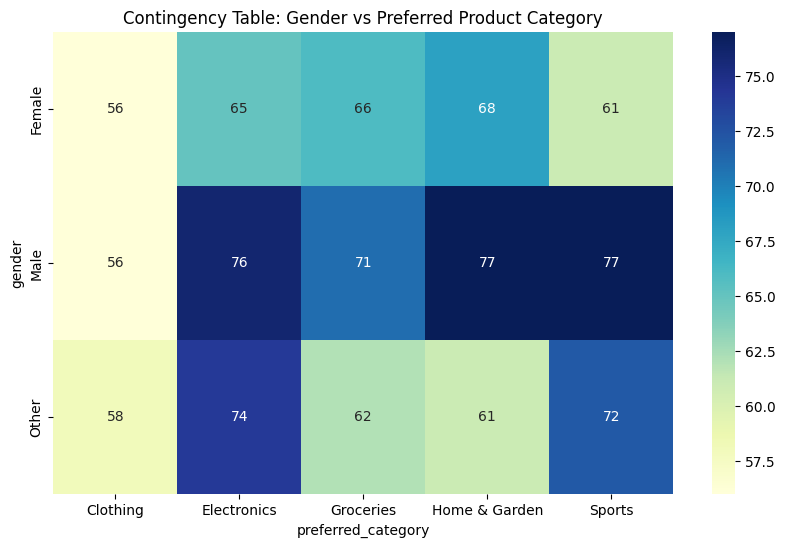

In [12]:
# Visualization: Contingency Table as a Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Contingency Table: Gender vs Preferred Product Category')
plt.show()